In [27]:
!pip3 install hyperopt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from hyperopt import hp

You should consider upgrading via the 'C:\Users\0x6f736f646f\OneDrive\Documents\Nakuja\BMPdata\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [28]:
df = pd.read_csv("../../Data/Raw/flightLogData.csv")

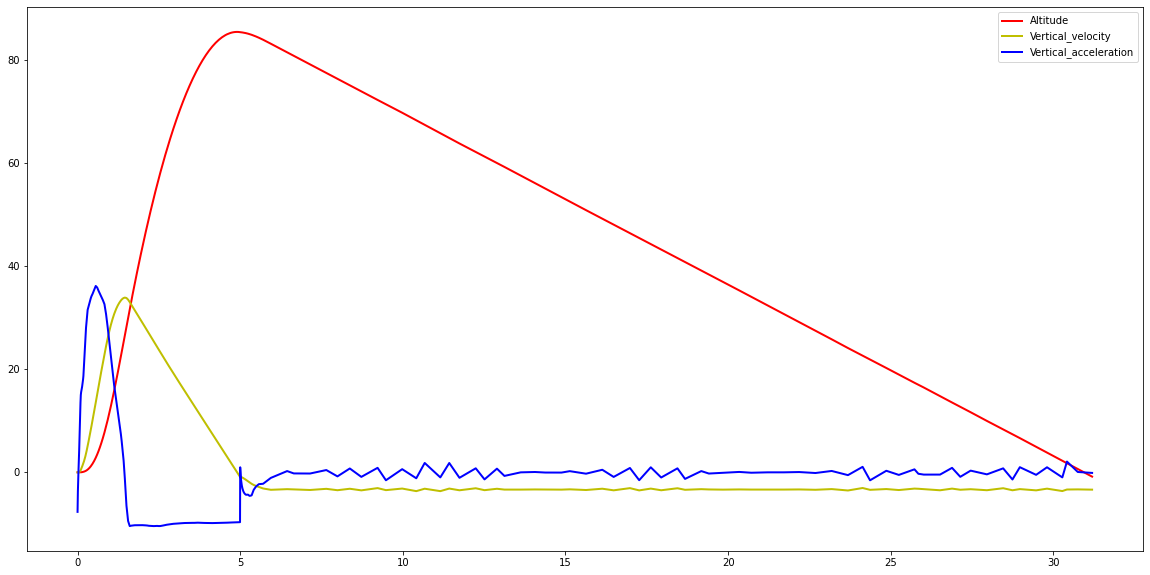

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(df.Time, df['Altitude'],  linewidth=2, color="r", label="Altitude")
plt.plot(df.Time, df['Vertical_velocity'],  linewidth=2, color="y", label="Vertical_velocity")
plt.plot(df.Time, df['Vertical_acceleration'],  linewidth=2, color="b", label="Vertical_acceleration")
plt.legend()
plt.show()

In [30]:
temp_df = df[['Altitude', "Vertical_velocity", "Vertical_acceleration"]]
noise = np.random.normal(2, 5, temp_df.shape)
noisy_df = temp_df + noise
noisy_df['Time'] = df['Time']


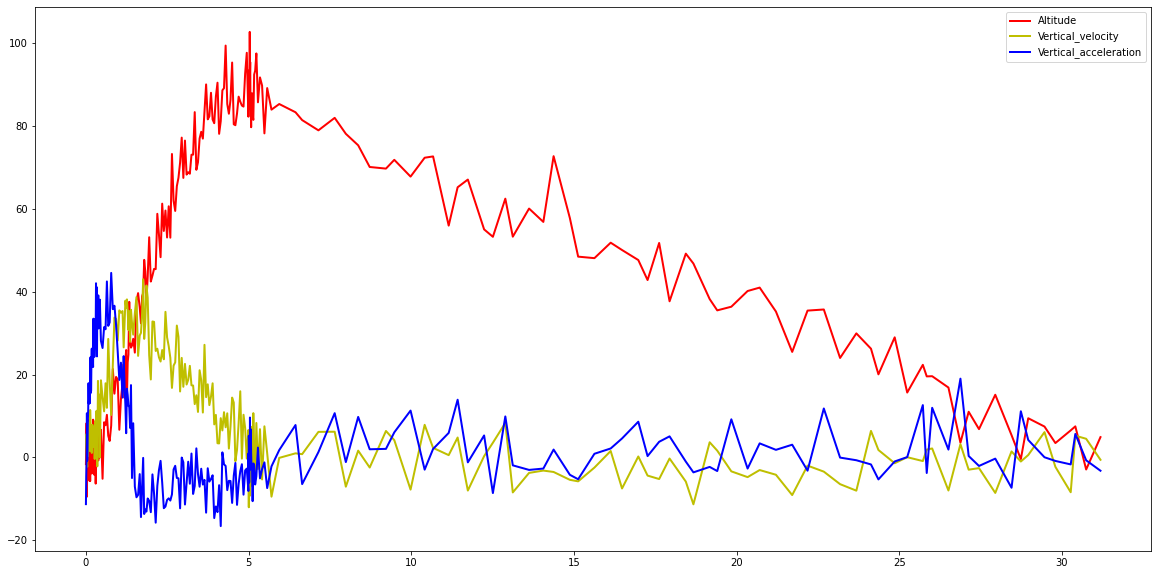

In [31]:
plt.figure(figsize=(20, 10))
plt.plot(noisy_df.Time, noisy_df['Altitude'],  linewidth=2, color="r", label="Altitude")
plt.plot(noisy_df.Time, noisy_df['Vertical_velocity'],  linewidth=2, color="y", label="Vertical_velocity")
plt.plot(noisy_df.Time, noisy_df['Vertical_acceleration'],  linewidth=2, color="b", label="Vertical_acceleration")
plt.legend()
plt.show()

In [32]:
q = 0.001
A = np.array([[1.0, 0.1, 0.005], [0, 1.0, 0.1], [0, 0, 1]])
H = np.array([[1.0, 0.0, 0.0],[ 0.0, 0.0, 1.0]])
P = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
# R = np.array([[0.5, 0.0], [0.0, 0.0012]])
# Q = np.array([[q, 0.0, 0.0], [0.0, q, 0.0], [0.0, 0.0, q]])
I = np.identity(3)
x_hat = np.array([[0.0], [0.0], [0.0]])
Y = np.array([[0.0], [0.0]])

In [36]:
def kalman_update(r1, r2, q1):
    R = np.array([[r1, 0.0], [0.0, r2]])
    Q = np.array([[q1, 0.0, 0.0], [0.0, q1, 0.0], [0.0, 0.0, q1]])
    
    A = np.array([[1.0, 0.1, 0.005], [0, 1.0, 0.1], [0, 0, 1]])
    H = np.array([[1.0, 0.0, 0.0],[ 0.0, 0.0, 1.0]])
    P = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
    I = np.identity(3)
    x_hat = np.array([[0.0], [0.0], [0.0]])
    Y = np.array([[0.0], [0.0]])

    new_altitude = []
    new_acceleration = []
    new_velocity = []
    
    for altitude, az in zip(noisy_df['Altitude'], noisy_df['Vertical_acceleration']):
        Z = np.array([[altitude], [az]])

        x_hat_minus = np.dot(A, x_hat)
        P_minus = np.dot(np.dot(A, P), np.transpose(A)) + Q
        K  = np.dot(np.dot(P_minus, np.transpose(H)), np.linalg.inv((np.dot(np.dot(H, P_minus), np.transpose(H)) + R)))
        Y = Z - np.dot(H, x_hat_minus)
        x_hat = x_hat_minus + np.dot(K, Y)
        P = np.dot((I - np.dot(K, H)), P_minus)
        Y = Z - np.dot(H, x_hat_minus)
        new_altitude.append(float(x_hat[0]))
        new_velocity.append(float(x_hat[1]))
        new_acceleration.append(float(x_hat[2]))
    return mean_squared_error(df['Altitude'], new_altitude), new_altitude

In [41]:
x,y = kalman_update(0.25, 0.75, 0.001)

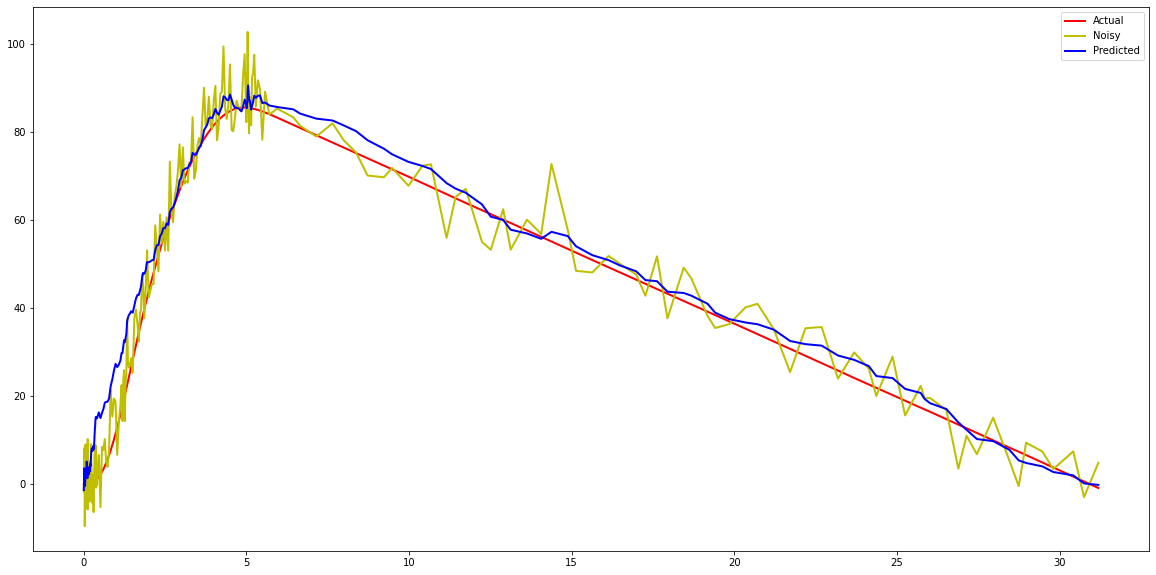

In [42]:
plt.figure(figsize=(20, 10))
plt.plot(noisy_df.Time, df['Altitude'],  linewidth=2, color="r", label="Actual")
plt.plot(noisy_df.Time, noisy_df['Altitude'],  linewidth=2, color="y", label="Noisy")
plt.plot(noisy_df.Time, y,  linewidth=2, color="b", label="Predicted")
plt.legend()
plt.show()